# Perceptron

The perceptron is an algorithm for supervised learning of binary classifiers. It can be seen as a single unit of an artificial neural network and is also known as the prototype for neural networks.

## Types
- **Single Layer Perceptron**: Can learn only linearly separable patterns
- **Multilayer Perceptron**: Can learn more complex patterns

## Components
- Inputs
- Weights
- Net input function
- Activation function
- Output

## Mathematical Foundation
- **Linear Model**: $y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n = w_0 + \sum_{i=1}^{n} w_ix_i$
- **Activation Function**: $f(x) = \begin{cases} 1 & \text{if } x \geq \theta \\ 0 & \text{if } x < \theta \end{cases}$
- **Approximation**: $\hat{y} = f(\sum_{i=1}^{n} w_ix_i)$
- **Perceptron Update Rule**: $w_i \leftarrow w_i + \alpha(y - \hat{y})x_i$
 - where $\alpha$ is the learning rate
 - $y$ is the true label
 - $\hat{y}$ is the predicted output

In [1]:
import numpy as np

In [2]:
# global function
def unit_step_func(x):
    return np.where(x > 0, 1, 0)

def accuracy(y_true, y_pred):
    acc = np.sum(y_true == y_pred) / len(y_true)
    return acc

In [3]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000,):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.activation_fun = unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init paramenters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y > 0, 1, 0)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_fun(linear_output)

                # Percepton update rule
                update = self.learning_rate * (y_[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update 

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.activation_fun(linear_output)
        return y_pred

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=1234
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

In [6]:
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

acc = accuracy(y_test, predictions)
print(acc)

1.0


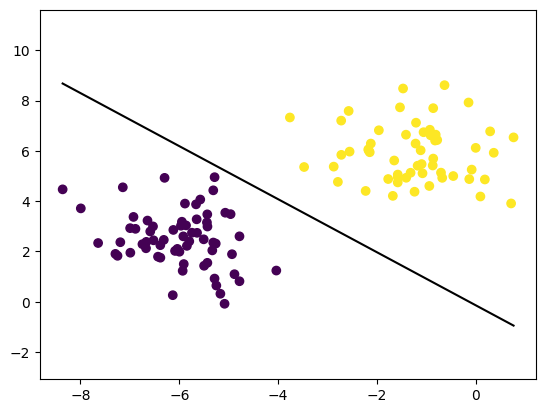

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])

ax.set_ylim([ymin - 3, ymax + 3])

plt.show()